# Table des matières

- ## Les requêtes de Marc
    - ### [Requête N°1](#section_1_1) - la proportion de personnes en état de sous-nutrition
    - ### [Requête N°2](#section_1_2) - le nombre théorique de personnes qui pourraient être nourries en 2017
    - ### [Requête N°3](#section_1_3) - le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité des produits végétaux en 2017
    * ### [Requête N°4](#section_1_4) - utilisation de la disponibilité intérieure. La part attribuée à l’alimentation animale, celle qui est perdue et celle qui est utilisée pour l'alimentation humaine
<br>
- ## Les requêtes de Mélanie
    - ### [Requête N°1](#section_2_1) - les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017
    - ### [Requête N°2](#section_2_2) - les pays qui ont le plus bénéficié d’aide depuis 2013
    - ### [Requête N°3](#section_2_3) - les pays ayant le plus/le moins de disponibilité/habitant
<br>
- ## Les pistes supplémentaires de recherche
    - ### [Requête N°1](#section_3_1) - les pistes supplémentaires de Julien concernant les céréales
    - ### [Requête N°2](#section_3_2) - la Thaïlande et l'utilisation du manioc

In [1]:
# Import des différentes librairies pour l'étude de santé
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Version des librairies utilisées pour ce notebook
print('\n'.join(f'{m.__name__} - {m.__version__}' 
                for m in globals().values() 
                if getattr(m, '__version__', None)))

pandas - 1.4.2
numpy - 1.21.5
seaborn - 0.11.2


### Options d'affichage

In [3]:
# Affichage de seulement deux chiffres après la virgule
pd.options.display.float_format = "{:.2f}".format

In [4]:
# Import des différents jeux de données
df_sous_nutrition = pd.read_csv('sous_nutrition.csv')
df_population = pd.read_csv('population.csv')
df_aide_alimentaire = pd.read_csv('aide_alimentaire.csv')
df_dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

## Requête N°1 - <a class="anchor" id="section_1_1">la proportion de personnes en état de sous-nutrition</a>

In [5]:
# Affichage de l'en-tête des valeurs de sous_nutrition
display(df_sous_nutrition.head())

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [6]:
# Recherche de possibles valeurs erronées pour un nettoyage
display(df_sous_nutrition['Valeur'].unique())

array(['8.6', '8.8', '8.9', '9.7', '10.5', '11.1', '2.2', '2.5', '2.8',
       '3', '3.1', '3.3', '0.1', '1.3', '1.2', nan, '7.6', '6.2', '5.3',
       '5.6', '5.8', '5.7', '1.5', '1.6', '1.1', '1.7', '<0.1', '21.7',
       '22.4', '23.3', '22.3', '21.5', '20.9', '0.8', '2', '1.9', '1.8',
       '0.4', '0.5', '0.3', '0.2', '3.2', '3.4', '3.6', '3.8', '2.1',
       '2.3', '2.4', '0.6', '0.7', '0.9', '3.9', '2.7', '1.4', '4.8',
       '4.6', '4.9', '5', '4.4', '4.3', '4.2', '4.5', '26.2', '24.3',
       '21.3', '21.1', '2.9', '5.1', '5.2', '5.4', '203.8', '198.3',
       '193.1', '190.9', '190.1', '189.2', '23.6', '24', '24.1', '3.7',
       '7.3', '7.8', '8.4', '9', '9.1', '10.1', '10', '10.7', '11.5',
       '11.9', '11.8', '8.7', '10.3', '11', '1', '5.5', '6.8', '7.9',
       '5.9', '7', '9.2', '9.4', '9.6', '6.7', '7.1', '7.2', '14.7',
       '17.4', '20.2', '22.2', '22.8', '24.6', '31.1', '28.5', '25.4',
       '24.8', '26.1', '14.5', '15.4', '16.5', '15.8', '15.7', '10.8',
       '

In [7]:
# Remplacement des valeurs "<0.1" par "0"
df_sous_nutrition.loc[df_sous_nutrition['Valeur'] == '<0.1'] = 0

In [8]:
# Remplacement des valeurs "nan" par 0
df_sous_nutrition.fillna(0, inplace=True)

In [9]:
# Vérification des colonnes avant de faire une jointure
display(df_sous_nutrition.columns)
display(df_population.columns)

Index(['Zone', 'Année', 'Valeur'], dtype='object')

Index(['Zone', 'Année', 'Valeur'], dtype='object')

In [10]:
# Création d'une variable "marc_1_sous_nutrition" pour scinder les résultats des différentes requêtes
# Jointure avec la colonne Zone et restriction sur l'année pour garder que l'année 2017
marc1_sous_nutrition = pd.merge(df_sous_nutrition.loc[df_sous_nutrition['Année'] == '2016-2018', ['Valeur', 'Zone']],
                               df_population.loc[df_population['Année'] == 2017, ['Valeur', 'Zone']],
                               on='Zone')

In [11]:
# Vérification de la jointure entre "sous_nutrition et population"
display(marc1_sous_nutrition.head())

,Valeur_x,Zone,Valeur_y
0,10.5,Afghanistan,36296.11
1,3.1,Afrique du Sud,57009.76
2,0.1,Albanie,2884.17
3,1.3,Algérie,41389.19
4,0,Allemagne,82658.41


In [12]:
# Renommage des colonnes pour plus de lisibilité
marc1_sous_nutrition.rename(columns=
                           {'Valeur_x' : 'Population sous-nutrition (millions)',
                           'Valeur_y' : 'Population (millions)'},
                           inplace=True)

In [13]:
# Vérification du renommage
display(marc1_sous_nutrition.head())

,Population sous-nutrition (millions),Zone,Population (millions)
0,10.5,Afghanistan,36296.11
1,3.1,Afrique du Sud,57009.76
2,0.1,Albanie,2884.17
3,1.3,Algérie,41389.19
4,0,Allemagne,82658.41


In [14]:
# Calcul de la population mondiale tout en mettant à l'échelle
population_mondiale = (marc1_sous_nutrition['Population (millions)'].sum())*1000

# Affichage de la population mondiale avec plus de lisibilité
print("La population mondiale est de {:,.0f} habitants.".format(population_mondiale))

La population mondiale est de 7,528,921,162 habitants.


In [15]:
# Modification du Dtype de "Personne sous-nutrition" pour le passer en float64
marc1_sous_nutrition['Population sous-nutrition (millions)'] = marc1_sous_nutrition[
    'Population sous-nutrition (millions)'].astype('float64')

In [16]:
# Calcul du nombre total de personnes en sous-nutrition dans le monde
population_sous_nutrition = marc1_sous_nutrition['Population sous-nutrition (millions)'].sum()*1000000

# Affichage de la population en sous-nutrition dans le monde
print("Il y a {:,.0f} habitants en sous-nutrition dans le monde.".format(population_sous_nutrition))

Il y a 535,700,000 habitants en sous-nutrition dans le monde.


In [17]:
# Calcul de la proportion de la population en sous-nutrition dans le monde
proportion_sous_nutrition = (population_sous_nutrition / population_mondiale) * 100

print("Il y a {:,.2f} % de la population mondiale en sous-nutrition dans le monde.".format(proportion_sous_nutrition))

Il y a 7.12 % de la population mondiale en sous-nutrition dans le monde.


In [18]:
# Calcul de la proportion de la population en nutrition standard dans le monde
proportion_nutrition_standard = (population_mondiale / population_mondiale * 100) - proportion_sous_nutrition
print("Il y a {:,.2f} % de la population mondiale en nutrition standard dans le monde.".format(proportion_nutrition_standard))

Il y a 92.88 % de la population mondiale en nutrition standard dans le monde.


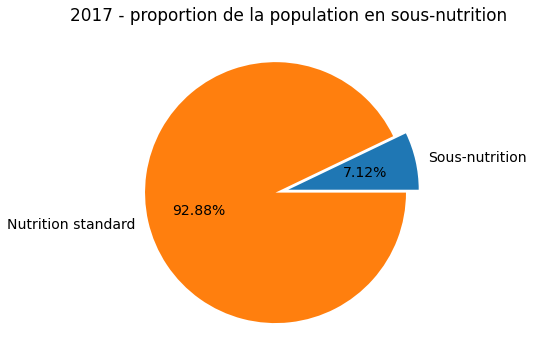

In [19]:
# Création du graphique
portion = [proportion_sous_nutrition, proportion_nutrition_standard]
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 14})
plt.pie(portion, labels=['Sous-nutrition', 'Nutrition standard'], autopct='%.2f%%', explode=(0, 0.1))
plt.title('2017 - proportion de la population en sous-nutrition')
plt.show()

## Requête N°2 - <a class="anchor" id="section_1_2">le nombre théorique de personnes qui pourraient être nourries en 2017</a>

In [20]:
# Vérification de l'importation des données
display(df_dispo_alimentaire.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.00,1.72,0.20,0.77,53.00,NaN,NaN,53.00,NaN,53.00,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.00,1.29,0.01,0.02,41.00,2.00,40.00,39.00,2.00,3.00,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.00,0.06,0.01,0.03,2.00,NaN,2.00,2.00,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.00,2.70,0.02,0.05,82.00,NaN,82.00,82.00,NaN,NaN,NaN,NaN,NaN


In [21]:
# Sélection des colonnes pour la requête demandée
marc2_dispo_alimentaire = df_dispo_alimentaire[[
    'Zone', 'Disponibilité alimentaire (Kcal/personne/jour)',
    'Disponibilité alimentaire en quantité (kg/personne/an)',
    'Disponibilité de matière grasse en quantité (g/personne/jour)',
    'Disponibilité de protéines en quantité (g/personne/jour)',
    'Disponibilité intérieure',
    'Exportations - Quantité',
    'Importations - Quantité'
]]

In [22]:
# Groupement des données sur la colonne "Zone"
marc2_dispo_alimentaire = marc2_dispo_alimentaire.groupby('Zone').sum()
[['Disponibilité alimentaire (Kcal/personne/jour)',
'Disponibilité alimentaire en quantité (kg/personne/an)']]
display(marc2_dispo_alimentaire.head())

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité
Zone,,,,,,,
Afghanistan,2087.00,351.41,33.50,58.26,13515.00,278.00,2988.00
Afrique du Sud,3020.00,564.80,83.58,85.33,61256.00,11674.00,7517.00
Albanie,3188.00,1095.54,106.48,111.37,4758.00,94.00,933.00
Algérie,3293.00,809.13,76.48,91.92,42630.00,655.00,17403.00
Allemagne,3503.00,957.52,141.62,101.39,162275.00,57431.00,65353.00


In [23]:
# Restriction sur l'année 2017
marc2_population = df_population.loc[df_population['Année'] == 2017, :]

In [24]:
# Jointure avec comme clé, la colonne "Zone" en "left" pour conserver les données de la population
marc2_population = pd.merge(marc2_population, marc2_dispo_alimentaire, on="Zone", how="left")

In [25]:
# Vérification de la jointure
display(marc2_population.head())

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité
0,Afghanistan,2017,36296.11,2087.00,351.41,33.50,58.26,13515.00,278.00,2988.00
1,Afrique du Sud,2017,57009.76,3020.00,564.80,83.58,85.33,61256.00,11674.00,7517.00
2,Albanie,2017,2884.17,3188.00,1095.54,106.48,111.37,4758.00,94.00,933.00
3,Algérie,2017,41389.19,3293.00,809.13,76.48,91.92,42630.00,655.00,17403.00
4,Allemagne,2017,82658.41,3503.00,957.52,141.62,101.39,162275.00,57431.00,65353.00


In [26]:
# Calcul de la disponibilité alimentaire (kcal) avec une mise à l'échelle
marc2_dispo_total_kal = ((marc2_population["Valeur"]*1000) * 
                         (marc2_population['Disponibilité alimentaire (Kcal/personne/jour)'])).sum()

print("La quantité de disponibilité alimentaire est de {:,.0f} kcal.".format(marc2_dispo_total_kal))

La quantité de disponibilité alimentaire est de 20,918,984,627,331 kcal.


In [27]:
# Calcul de sii on part d'une base de 2500 Kcal par personne, par jour
marc2_total_nourri = marc2_dispo_total_kal / 2500

print("Le nombre théorique de personnes qui pourraient être nourries en 2017 est de {:,.0f} personnes."
      .format(marc2_total_nourri))

Le nombre théorique de personnes qui pourraient être nourries en 2017 est de 8,367,593,851 personnes.


In [28]:
# Calcul de la population mondiale
marc2_population_totale = (marc2_population['Valeur']*1000).sum()

print("La population mondiale en 2017 est de {:,.0f} personnes".format(marc2_population_totale))

La population mondiale en 2017 est de 7,548,134,111 personnes


In [29]:
# Calcul de la proportion de personnes pouvant être nourries
marc2_proportion = ((marc2_total_nourri / marc2_population_totale) * 100).sum()

print
("Le nombre de personnes pouvant être nourries grâce à la disponibilité alimentaire (kcal) totale est de : {:,.2f} %"
 .format(marc2_proportion))

'Le nombre de personnes pouvant être nourries grâce à la disponibilité alimentaire (kcal) totale est de : 110.86 %'

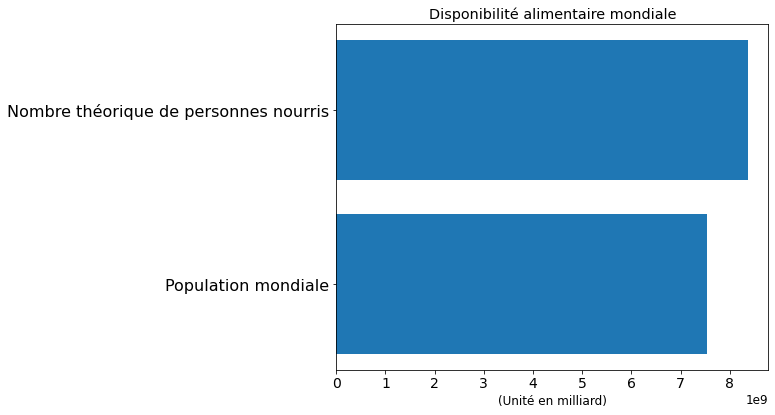

In [135]:
# Création du graphique pour présenter les résultats
fig = plt.figure()
plt.rcParams.update({'font.size': 12})

# Ajout des axes
axes = fig.add_axes([0, 0.8, 1, 1.2])

# Création des listes de données
population_x = ['Population mondiale','Nombre théorique de personnes nourris']
chiffres_y = [marc2_population_totale, marc2_total_nourri]

# Création du titre
plt.title('Disponibilité alimentaire mondiale')

# Ajout d'un label sur l'axe x
plt.xlabel("(Unité en milliard)")
plt.barh(population_x,chiffres_y)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.show()

## Requête N°3 - <a class="anchor" id="section_1_3">le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité des produits végétaux en 2017</a>

In [31]:
marc3_dispo_alimentaire = df_dispo_alimentaire
marc3_population = df_population

In [32]:
display(marc3_dispo_alimentaire.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.00,1.72,0.20,0.77,53.00,NaN,NaN,53.00,NaN,53.00,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.00,1.29,0.01,0.02,41.00,2.00,40.00,39.00,2.00,3.00,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.00,0.06,0.01,0.03,2.00,NaN,2.00,2.00,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.00,2.70,0.02,0.05,82.00,NaN,82.00,82.00,NaN,NaN,NaN,NaN,NaN


In [33]:
# Sélection des colonnes qui nous intéressent pour la suite
marc3_dispo_alimentaire = marc3_dispo_alimentaire[[
    "Zone", "Produit", "Origine",
    "Disponibilité alimentaire (Kcal/personne/jour)",
    "Disponibilité alimentaire en quantité (kg/personne/an)",
    "Disponibilité de protéines en quantité (g/personne/jour)"
]]

In [34]:
# Réstriction pour ne garder que les données d'aliments d'origine végétale
marc3_dispo_alimentaire = marc3_dispo_alimentaire.loc[marc3_dispo_alimentaire['Origine'] == 'vegetale',:]

In [35]:
# Regroupage et addition des données par "Zone"
marc3_dispo_alimentaire = marc3_dispo_alimentaire.groupby('Zone').sum()

In [36]:
# Affichage des deux opérations précédentes
display(marc3_dispo_alimentaire.head())

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour)
Zone,,,
Afghanistan,1871.00,271.49,46.05
Afrique du Sud,2533.00,425.17,48.94
Albanie,2203.00,706.49,51.96
Algérie,2915.00,632.35,66.94
Allemagne,2461.00,568.82,39.90


In [37]:
# Réstriction pour ne garder que l'année 2017
marc3_population = marc3_population.loc[marc3_population['Année'] == 2017, :]

In [38]:
# Vérification de la réstriction
display(marc3_population.head())

,Zone,Année,Valeur
4,Afghanistan,2017,36296.11
10,Afrique du Sud,2017,57009.76
16,Albanie,2017,2884.17
22,Algérie,2017,41389.19
28,Allemagne,2017,82658.41


In [39]:
# Jointure des deux df en prenant en index la colonne "Zone"
marc3_dispo_alimentaire = pd.merge(marc3_dispo_alimentaire, marc3_population, on="Zone")

In [40]:
# Calcul de la disponiblité alimentaire en mettant à l'echelle la colonne "Valeur"
marc3_total_dispo_vegetale_kcal = (((marc3_dispo_alimentaire['Valeur'] * 1000) * 
                                    marc3_dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)']).sum()) / 2500

print("La population pouvant être nourrie avec la disponibilité alimentaire végétale totale est de {:,.2f} habitants."
      .format(marc3_total_dispo_vegetale_kcal))

La population pouvant être nourrie avec la disponibilité alimentaire végétale totale est de 6,904,305,684.60 habitants.


In [41]:
# Calcul de la population mondiale
marc3_population_totale = (marc3_population['Valeur'] * 1000).sum()

print("La population mondiale en 2017 est de {:,.0f} habitants.".format(marc3_population_totale))

La population mondiale en 2017 est de 7,548,134,111 habitants.


In [42]:
# Calcul de la proportion de la disponibilité alimentaire végétale par rapport à la population mondiale
marc3_proportion = ((marc3_total_dispo_vegetale_kcal / marc3_population_totale) * 100).sum()

print("La proportion totale d'habitants pouvant être nourrie avec la disponibilité alimentaire végétale est de {:,.2f} %"
      .format(marc3_proportion))

La proportion totale d'habitants pouvant être nourrie avec la disponibilité alimentaire végétale est de 91.47 %


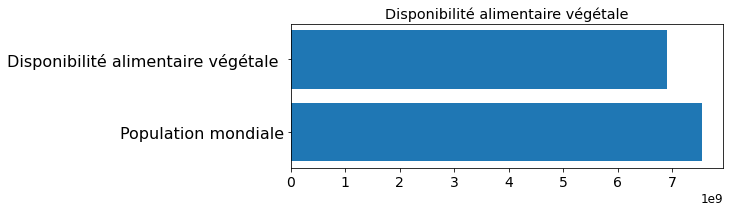

In [43]:
# Création du graphique pour afficher les résultats

# Création du graphique pour présenter les résultats
fig = plt.figure()
plt.rcParams.update({'font.size': 12})

# Ajout des axes
axes = fig.add_axes([0,1,1,0.5])

# Création des listes de données
population_x = ['Population mondiale','Disponibilité alimentaire végétale ']
chiffres_y = [marc3_population_totale, marc3_total_dispo_vegetale_kcal]

# Création du titre
plt.title('Disponibilité alimentaire végétale')

# Ajout d'un label sur l'axe x
plt.barh(population_x,chiffres_y)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.show()

## Requête N°4 - <a class="anchor" id="section_1_4">utilisation de la disponibilité intérieure. La part attribuée à l’alimentation animale, celle qui est perdue et celle qui est utilisée pour l'alimentation humaine</a>

In [44]:
marc4_dispo_alimentaire = df_dispo_alimentaire
marc4_population = df_population

In [45]:
df_dispo_alimentaire.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [46]:
# Sélection des colonnes qui nous intéressent pour la suite
marc4_dispo_alimentaire = marc4_dispo_alimentaire[['Zone','Aliments pour animaux','Autres Utilisations',
                                                   'Disponibilité intérieure','Exportations - Quantité',
                                                   'Importations - Quantité','Nourriture','Pertes','Production',
                                                   'Semences','Traitement','Variation de stock']]

In [47]:
display(marc4_dispo_alimentaire.head())

,Zone,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,53.00,NaN,NaN,53.00,NaN,53.00,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,41.00,2.00,40.00,39.00,2.00,3.00,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,2.00,NaN,2.00,2.00,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,NaN,NaN,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,NaN,NaN,82.00,NaN,82.00,82.00,NaN,NaN,NaN,NaN,NaN


In [48]:
# Regroupage et addition des données par "Zone"
marc4_dispo_alimentaire = marc4_dispo_alimentaire.groupby('Zone').sum()

In [49]:
# Remplacement des valeurs "nan" par 0 pour éviter les erreurs de calculs
marc4_dispo_alimentaire.fillna(0, inplace=True)

In [50]:
# Jointure à l'aide des données de population avec la colonne "Zone"
marc4_dispo_alimentaire = pd.merge(marc4_dispo_alimentaire, marc4_population, on='Zone', how='left')

In [51]:
# Calcul de la proportion de disponibilité alimentaire pour les animaux
marc4_proportion_aliments_animaux = (marc4_dispo_alimentaire['Aliments pour animaux'].sum() / 
                                    marc4_dispo_alimentaire['Disponibilité intérieure'].sum() * 100)

print("La proportion pour l'alimentation animale est de {:,.2f} %".format(marc4_proportion_aliments_animaux))

La proportion pour l'alimentation animale est de 13.23 %


In [52]:
# Calcul de la proportion de disponibilité alimentaire perdue
marc4_proportion_pertes = (marc4_dispo_alimentaire['Pertes'].sum() / 
                           marc4_dispo_alimentaire['Disponibilité intérieure'].sum() * 100)

print("La proportion des pertes est de {:,.2f} %".format(marc4_proportion_pertes))

La proportion des pertes est de 4.64 %


In [53]:
# Calcul de la proportion de disponibilité alimentaire pour les humains
marc4_proportion_aliments_humains = (marc4_dispo_alimentaire['Nourriture'].sum() / 
                                    marc4_dispo_alimentaire['Disponibilité intérieure'].sum() * 100)

print("La proportion pour l'alimentation humaine est de {:,.2f} %".format(marc4_proportion_aliments_humains))

La proportion pour l'alimentation humaine est de 49.39 %


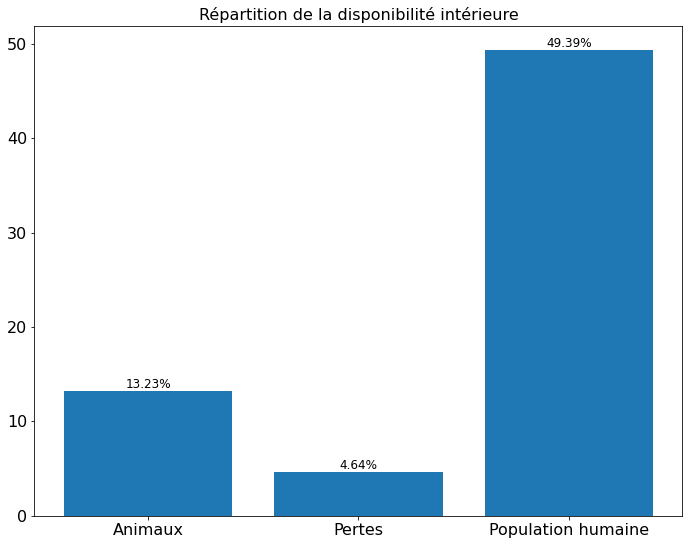

In [146]:
# Récupération des différentes données et création du graphique

fig = plt.figure()
axes = fig.add_axes([0.4, 0.4, 1.5, 1.7])
population_x = ['Animaux', 'Pertes', 'Population humaine']
chiffres_y = [marc4_proportion_aliments_animaux, marc4_proportion_pertes, marc4_proportion_aliments_humains]
plt.bar(population_x, chiffres_y)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Répartition de la disponibilité intérieure", fontsize=16)

for i in axes.containers:
    axes.bar_label(i, fontsize=12, fmt='%.2f%%')
plt.show()

## Requête N°1 - <a class="anchor" id="section_2_1">les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017</a>

In [55]:
melanie1_sous_nutrition = df_sous_nutrition
melanie1_population = df_population

In [56]:
# Remplacement des valeurs "<0.1" par 0 pour éviter les erreurs de calculs
melanie1_sous_nutrition.loc[melanie1_sous_nutrition['Valeur'] == '<0.1' ] = 0

# Remplacement des valeurs nan par 0 pour éviter également les erreurs de calculs
melanie1_sous_nutrition.fillna(0, inplace=True)

In [57]:
# Changement du type de la colonne "Valeur" pour la passer en float64 pour les calculs
melanie1_sous_nutrition['Valeur'] = melanie1_sous_nutrition['Valeur'].apply(pd.to_numeric)

In [58]:
# Jointure avec la colonne "Zone" et restriction sur l'année pour garder que l'année 2017
melanie1_sous_nutrition = pd.merge(
    melanie1_sous_nutrition.loc[melanie1_sous_nutrition['Année'] == '2016-2018', ['Valeur', 'Zone']],
                                  melanie1_population.loc[melanie1_population['Année'] == 2017, ['Année', 'Valeur', 'Zone']],
                                  on='Zone')

In [59]:
# Vérification de la jointure
display(melanie1_sous_nutrition.head())

,Valeur_x,Zone,Année,Valeur_y
0,10.50,Afghanistan,2017,36296.11
1,3.10,Afrique du Sud,2017,57009.76
2,0.10,Albanie,2017,2884.17
3,1.30,Algérie,2017,41389.19
4,0.00,Allemagne,2017,82658.41


In [60]:
# Renommage des colonnes pour plus de lisibilité
melanie1_sous_nutrition.rename(columns=
                           {'Valeur_x' : 'Population sous-nutrition (millions)',
                           'Valeur_y' : 'Population (millions)'},
                           inplace=True)

In [61]:
# Mise à l'échelle de la colonne "Population sous-nutrition (millions)"
melanie1_sous_nutrition['Population sous-nutrition (millions)'] = (
    melanie1_sous_nutrition['Population sous-nutrition (millions)']) * 1000000

In [62]:
# Mise à l'échelle de la colonne "Population (millions)"
melanie1_sous_nutrition['Population (millions)'] = (melanie1_sous_nutrition['Population (millions)']) * 1000

In [63]:
# Création d'une colonne "Proportion" pour pouvoir finaliser la demande initiale
melanie1_sous_nutrition['Proportion'] = (
    melanie1_sous_nutrition['Population sous-nutrition (millions)'] / 
    melanie1_sous_nutrition['Population (millions)'] * 100
)

In [64]:
# Tri de la colonne proportion par ordre décroissant
melanie1_sous_nutrition = melanie1_sous_nutrition.sort_values(by='Proportion', ascending=False)

In [65]:
display(melanie1_sous_nutrition.head(10))

,Population sous-nutrition (millions),Zone,Année,Population (millions),Proportion
69,5300000.00,Haïti,2017,10982366.00,48.26
142,12000000.00,République populaire démocratique de Corée,2017,25429825.00,47.19
96,10500000.00,Madagascar,2017,25570512.00,41.06
92,1800000.00,Libéria,2017,4702226.00,38.28
89,800000.00,Lesotho,2017,2091534.00,38.25
165,5700000.00,Tchad,2017,15016753.00,37.96
146,4200000.00,Rwanda,2017,11980961.00,35.06
108,9400000.00,Mozambique,2017,28649018.00,32.81
168,400000.00,Timor-Leste,2017,1243258.00,32.17
0,10500000.00,Afghanistan,2017,36296113.00,28.93


In [66]:
# Création d'un dataframe pour stocker définitivement que les 10 premiers résultats les plus hauts
df_melanie1_sous_nutrition_sorted = melanie1_sous_nutrition.head(10)

In [67]:
df_melanie1_sous_nutrition_sorted.head(10)

,Population sous-nutrition (millions),Zone,Année,Population (millions),Proportion
69,5300000.00,Haïti,2017,10982366.00,48.26
142,12000000.00,République populaire démocratique de Corée,2017,25429825.00,47.19
96,10500000.00,Madagascar,2017,25570512.00,41.06
92,1800000.00,Libéria,2017,4702226.00,38.28
89,800000.00,Lesotho,2017,2091534.00,38.25
165,5700000.00,Tchad,2017,15016753.00,37.96
146,4200000.00,Rwanda,2017,11980961.00,35.06
108,9400000.00,Mozambique,2017,28649018.00,32.81
168,400000.00,Timor-Leste,2017,1243258.00,32.17
0,10500000.00,Afghanistan,2017,36296113.00,28.93


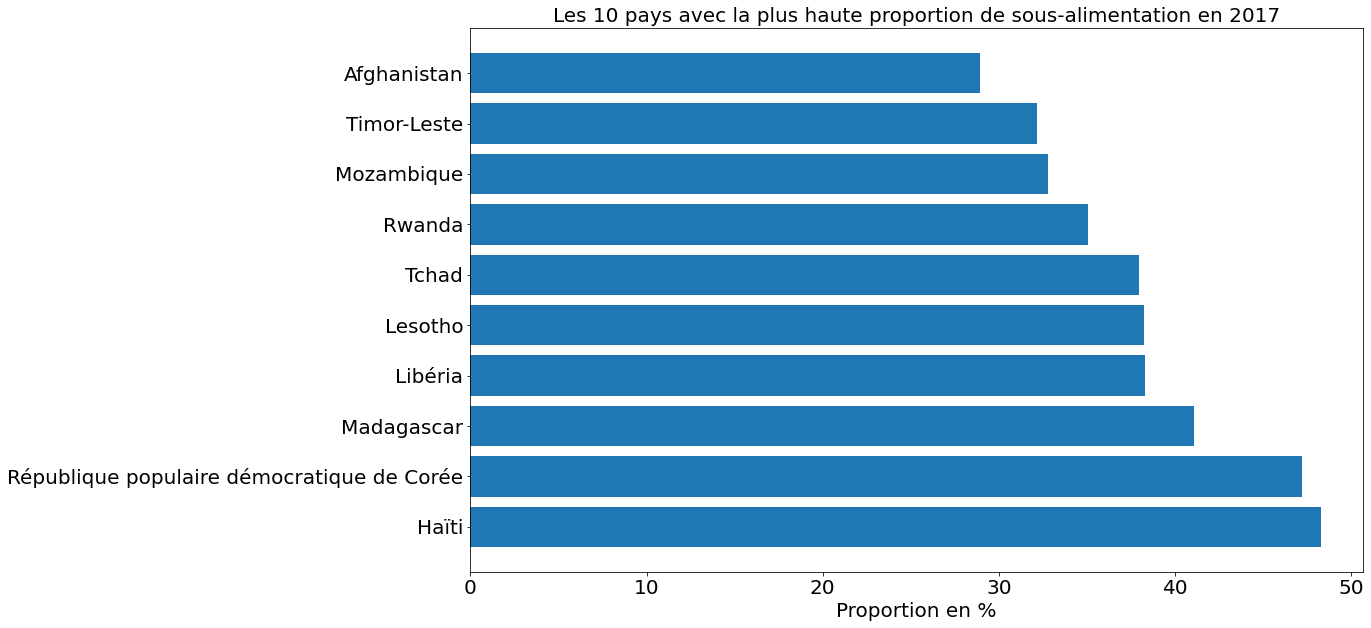

In [149]:
df_melanie1_plot = df_melanie1_sous_nutrition_sorted
plt.figure(figsize=(16, 10))
plt.barh(df_melanie1_plot['Zone'], df_melanie1_plot['Proportion'])
plt.title('Les 10 pays avec la plus haute proportion de sous-alimentation en 2017', fontsize=20)
plt.xlabel('Proportion en %', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## Requête N°2 - <a class="anchor" id="section_2_2">les pays qui ont le plus bénéficié d’aide depuis 2013</a>

In [69]:
melanie2_aide_alimentaire = df_aide_alimentaire

In [70]:
# Regroupement par pays bénéficiaire en additionnant les valeurs
melanie2_aide_alimentaire = melanie2_aide_alimentaire.groupby('Pays bénéficiaire').sum()

In [71]:
# Création de la colonne proportion
melanie2_aide_alimentaire['Proportion'] = (
    melanie2_aide_alimentaire['Valeur'] / melanie2_aide_alimentaire['Valeur'].sum() * 100)

In [72]:
# Vérification de la colonne proportion
display(melanie2_aide_alimentaire.head())

,Année,Valeur,Proportion
Pays bénéficiaire,,,
Afghanistan,32216,185452,1.68
Algérie,78561,81114,0.74
Angola,8054,5014,0.05
Bangladesh,50347,348188,3.16
Bhoutan,24170,2666,0.02


In [73]:
# Tri des données "Proportion" et affichage par ordre décroissant
melanie2_aide_alimentaire = melanie2_aide_alimentaire.sort_values(by='Proportion', ascending=False)

In [74]:
# Suppression de la colonne année (non-requise pour la demande)
del melanie2_aide_alimentaire['Année']

In [75]:
# Renommage des colonnes "Proportion" et "Valeur" pour plus de lisibilité
melanie2_aide_alimentaire = melanie2_aide_alimentaire.rename(
    columns={'Proportion' : 'Proportion (%)',
            'Valeur': 'Valeur (Tonnes)'})

In [76]:
melanie2_aide_alimentaire_sorted = melanie2_aide_alimentaire.head(10)

In [77]:
melanie2_aide_alimentaire_sorted.head(10)

,Valeur (Tonnes),Proportion (%)
Pays bénéficiaire,,
République arabe syrienne,1858943,16.84
Éthiopie,1381294,12.52
Yémen,1206484,10.93
Soudan du Sud,695248,6.30
Soudan,669784,6.07
Kenya,552836,5.01
Bangladesh,348188,3.16
Somalie,292678,2.65
République démocratique du Congo,288502,2.61


In [78]:
# Création d'un np array pour stocker les données de proportion
np_melanie2_proportion = melanie2_aide_alimentaire_sorted['Proportion (%)'].to_numpy()

In [79]:
# Création d'un np array pour stocker les labels
np_melanie2_labels_pays = np.array(['République arabe syrienne', 'Ethiopie', 'Yémen',
                                   'Soudan du Sud', 'Soudan', 'Kenya', 'Bangladesh',
                                   'Somalie', 'République démocratique du Congo', 'Niger'])

In [80]:
# On arrondis les proportions à deux chiffres après la virgule pour une meilleure lisibilité
np_melanie2_proportion = np.around(np_melanie2_proportion, decimals=2)

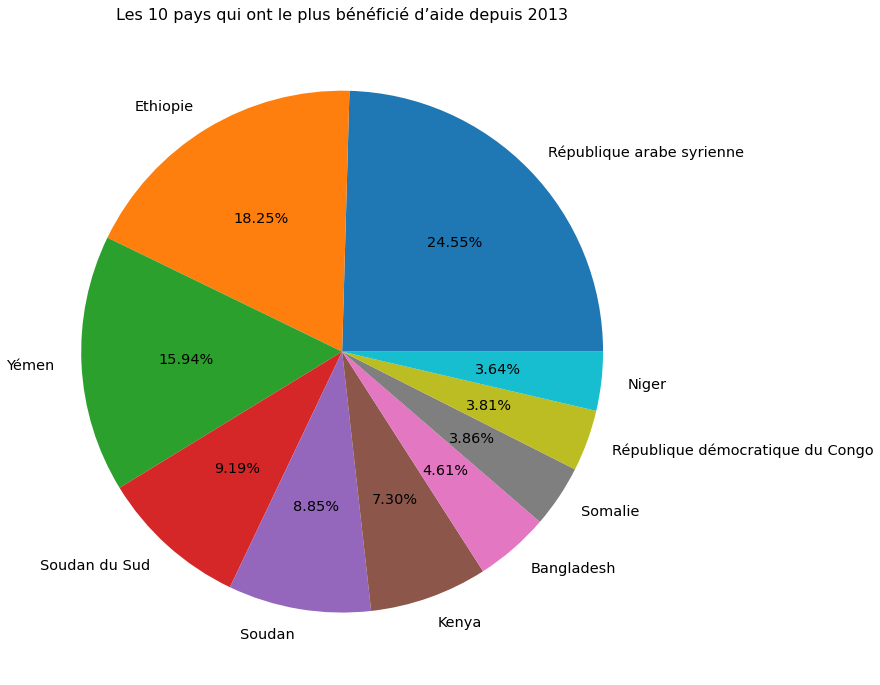

In [81]:
plt.figure(figsize=(16, 12))
plt.pie(np_melanie2_proportion, labels=np_melanie2_labels_pays, autopct='%.2f%%', textprops={'fontsize': 14.5})
plt.title('Les 10 pays qui ont le plus bénéficié d’aide depuis 2013', fontsize=16)
plt.show()

## Requête N°3 - <a class="anchor" id="section_2_3">les pays ayant le plus/le moins de disponibilité/habitant</a>

In [82]:
melanie3_dispo_alimentaire = df_dispo_alimentaire
melanie3_population = df_population

In [83]:
melanie3_dispo_alimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.00,1.72,0.20,0.77,53.00,NaN,NaN,53.00,NaN,53.00,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.00,1.29,0.01,0.02,41.00,2.00,40.00,39.00,2.00,3.00,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.00,0.06,0.01,0.03,2.00,NaN,2.00,2.00,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.00,0.00,NaN,NaN,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.00,2.70,0.02,0.05,82.00,NaN,82.00,82.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.00,4.70,4.28,1.41,3.00,NaN,0.00,3.00,NaN,2.00,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.00,3.34,0.69,1.14,2.00,NaN,2.00,2.00,NaN,0.00,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.00,0.06,NaN,0.04,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.00,0.07,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN


In [84]:
# Sélection des colonnes intéressantes pour la demande
melanie3_dispo_alimentaire = melanie3_dispo_alimentaire[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)']]

In [85]:
# Restriction sur l'année 2017
melanie3_population = melanie3_population.loc[melanie3_population['Année'] == 2017, :]

In [86]:
# Groupement des données en additionnant les dispos alimentaire par pays
melanie3_dispo_alimentaire = melanie3_dispo_alimentaire.groupby('Zone').sum()

In [87]:
display(melanie3_dispo_alimentaire.head())

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087.00
Afrique du Sud,3020.00
Albanie,3188.00
Algérie,3293.00
Allemagne,3503.00


In [88]:
# Mise à l'échelle de la valeur de la population des pays
melanie3_population['Valeur'] = melanie3_population['Valeur'] * 1000

C:\Users\Walid\AppData\Local\Temp\ipykernel_10144\3750179068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melanie3_population['Valeur'] = melanie3_population['Valeur'] * 1000


In [89]:
# Jointure entre les deux dataframes avec la colonne Zone
melanie3_dispo_alimentaire = pd.merge(melanie3_population, melanie3_dispo_alimentaire, on='Zone')

In [90]:
display(melanie3_dispo_alimentaire.head(10))

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296113.00,2087.00
1,Afrique du Sud,2017,57009756.00,3020.00
2,Albanie,2017,2884169.00,3188.00
3,Algérie,2017,41389189.00,3293.00
4,Allemagne,2017,82658409.00,3503.00
5,Angola,2017,29816766.00,2474.00
6,Antigua-et-Barbuda,2017,95426.00,2416.00
7,Arabie saoudite,2017,33101179.00,3255.00
8,Argentine,2017,43937140.00,3226.00
9,Arménie,2017,2944791.00,2924.00


In [91]:
# Création d'un dataframe pour stocker les pays avec le plus de disponibilité alimentaire
melanie3_dispo_alimentaire_plus = melanie3_dispo_alimentaire.sort_values(
    by=['Disponibilité alimentaire (Kcal/personne/jour)', 'Valeur'], ascending=False)

In [92]:
display(melanie3_dispo_alimentaire_plus.head(10))

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,2017,8819901.00,3770.00
17,Belgique,2017,11419748.00,3737.00
163,Turquie,2017,81116450.00,3708.00
54,États-Unis d'Amérique,2017,325084756.00,3682.00
80,Israël,2017,8243848.00,3610.00
78,Irlande,2017,4753279.00,3602.00
81,Italie,2017,60673701.00,3578.00
95,Luxembourg,2017,591910.00,3540.00
47,Égypte,2017,96442591.00,3518.00
4,Allemagne,2017,82658409.00,3503.00


In [93]:
# Création d'un dataframe pour stocker les pays avec le moins de disponibilité alimentaire
melanie3_dispo_alimentaire_moins = melanie3_dispo_alimentaire.sort_values(
    by=['Disponibilité alimentaire (Kcal/personne/jour)', 'Valeur'], ascending=True)

In [94]:
display(melanie3_dispo_alimentaire_moins.head(10))

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
131,République centrafricaine,2017,4596023.00,1879.00
170,Zambie,2017,16853599.00,1924.00
97,Madagascar,2017,25570512.00,2056.00
0,Afghanistan,2017,36296113.00,2087.00
70,Haïti,2017,10982366.00,2089.00
136,République populaire démocratique de Corée,2017,25429825.00,2093.00
156,Tchad,2017,15016753.00,2109.00
171,Zimbabwe,2017,14236595.00,2113.00
120,Ouganda,2017,41166588.00,2126.00
158,Timor-Leste,2017,1243258.00,2129.00


In [95]:
# Création d'une copie du dataframe pour garder que les 10 premiers résultats
melanie3_dispo_alimentaire_plus10 = melanie3_dispo_alimentaire_plus.head(10)

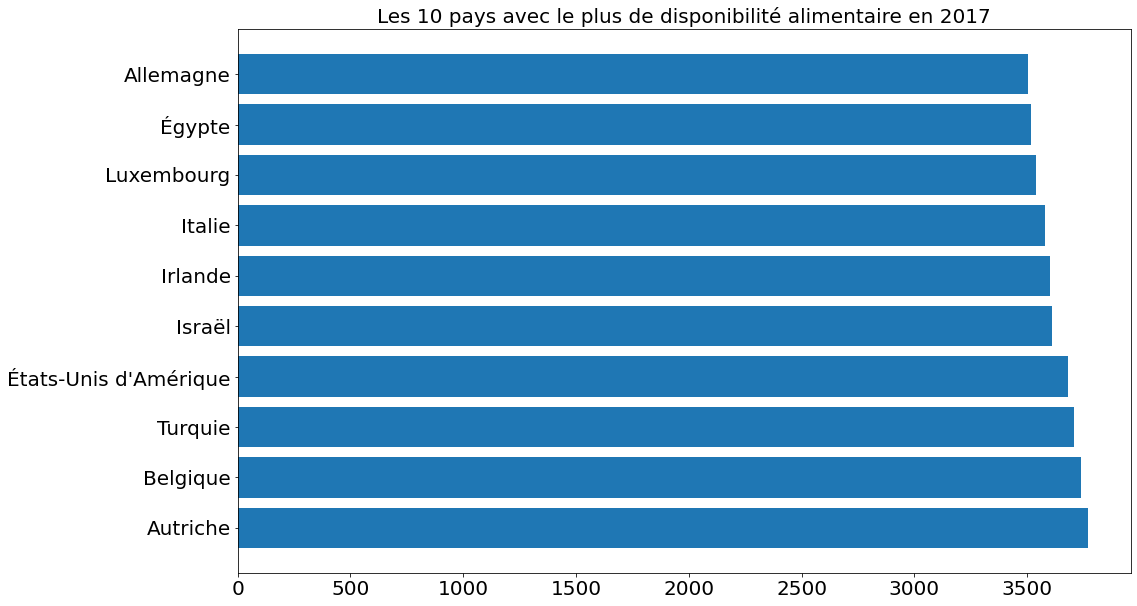

In [96]:
# Création du graphique pour les 10 pays avec le plus de disponibilité alimentaire
plt.figure(figsize=(16, 10))
plt.barh(
    melanie3_dispo_alimentaire_plus10['Zone'], 
    melanie3_dispo_alimentaire_plus10['Disponibilité alimentaire (Kcal/personne/jour)'])
plt.title('Les 10 pays avec le plus de disponibilité alimentaire en 2017', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [97]:
# Création d'une copie du dataframe pour garder que les 10 premiers résultats
melanie3_dispo_alimentaire_moins10 = melanie3_dispo_alimentaire_moins.head(10)

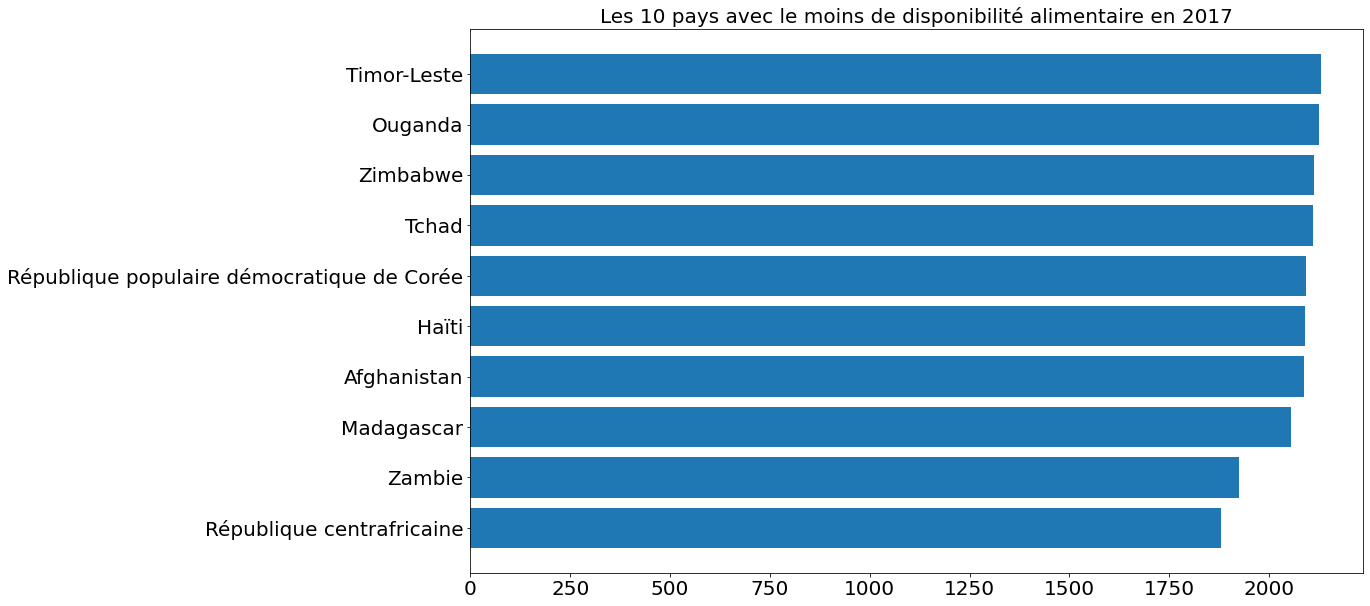

In [98]:
# Création du graphique pour les 10 pays avec le moins de disponibilité alimentaire
plt.figure(figsize=(16, 10))
plt.barh(
    melanie3_dispo_alimentaire_moins10['Zone'], 
    melanie3_dispo_alimentaire_moins10['Disponibilité alimentaire (Kcal/personne/jour)'])
plt.title('Les 10 pays avec le moins de disponibilité alimentaire en 2017', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## Requête N°1 - <a class="anchor" id="section_3_1">les pistes supplémentaires de Julien concernant les céréales</a>

In [99]:
# Récupération des données concernant les céréales provenant du site de la FAO
df_cereales = pd.read_csv('cereales-2017.csv')

In [100]:
display(df_cereales.head())

,Domaine,Zone,Élément,Produit,Année,Valeur
0,Bilans Alimentaires (2010-),Afghanistan,Production,Blé et produits,2017,4281.00
1,Bilans Alimentaires (2010-),Afghanistan,Importations - Quantité,Blé et produits,2017,3080.00
2,Bilans Alimentaires (2010-),Afghanistan,Variation de stock,Blé et produits,2017,208.00
3,Bilans Alimentaires (2010-),Afghanistan,Exportations - Quantité,Blé et produits,2017,2.00
4,Bilans Alimentaires (2010-),Afghanistan,Disponibilité intérieure,Blé et produits,2017,7151.00


In [101]:
df_cereales.columns

Index(['Domaine', 'Zone', 'Élément', 'Produit', 'Année', 'Valeur'], dtype='object')

In [102]:
# Création d'un dataframe pour garder que les colonnes qui nous intéressentt
df_dispo_cereales = df_cereales[['Zone', 'Élément', 'Produit', 'Valeur']]

In [103]:
df_dispo_cereales

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.00
1,Afghanistan,Importations - Quantité,Blé et produits,3080.00
2,Afghanistan,Variation de stock,Blé et produits,208.00
3,Afghanistan,Exportations - Quantité,Blé et produits,2.00
4,Afghanistan,Disponibilité intérieure,Blé et produits,7151.00
...,...,...,...,...
19900,Zimbabwe,Nourriture,"Céréales, Autres",3.00
19901,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,"Céréales, Autres",0.19
19902,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),"Céréales, Autres",2.00
19903,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,"Céréales, Autres",0.04


In [104]:
df_dispo_cereales = pd.pivot(df_dispo_cereales, index=['Zone', 'Produit'], columns=['Élément'], values=['Valeur'])

In [105]:
display(df_dispo_cereales.head())

Valeur  \
Élément                        Alimentation pour touristes   
Zone        Produit                                          
Afghanistan Avoine                                     NaN   
            Blé et produits                            NaN   
            Céréales, Autres                           NaN   
            Maïs et produits                           NaN   
            Millet et produits                         NaN   

                                                      \
Élément                        Aliments pour animaux   
Zone        Produit                                    
Afghanistan Avoine                              0.00   
            Blé et produits                   221.00   
            Céréales, Autres                    0.00   
            Maïs et produits                  111.00   
            Millet et produits                  0.00   

                                                                      \
Élément                        Autres utilisations (non alimentaire)   
Zone        Produit                                                    
Afghanistan Avoine                                               NaN   
            Blé et produits                                      NaN   
            Céréales, Autres                                     NaN   
            Maïs et produits                                    7.00   
            Millet et produits                                   NaN   

                                                                               \
Élément                        Disponibilité alimentaire (Kcal/personne/jour)   
Zone        Produit                                                             
Afghanistan Avoine                                                       0.00   
            Blé et produits                                           1404.00   
            Céréales, Autres                                             0.00   
            Maïs et produits                                             9.00   
            Millet et produits                                           1.00   

                                                                                       \
Élément                        Disponibilité alimentaire en quantité (kg/personne/an)   
Zone        Produit                                                                     
Afghanistan Avoine                                                           0.00       
            Blé et produits                                                163.76       
            Céréales, Autres                                                 0.00       
            Maïs et produits                                                 1.06       
            Millet et produits                                               0.16       

                                                                                              \
Élément                        Disponibilité de matière grasse en quantité (g/personne/jour)   
Zone        Produit                                                                            
Afghanistan Avoine                                                           0.00              
            Blé et produits                                                  5.08              
            Céréales, Autres                                                 0.00              
            Maïs et produits                                                 0.13              
            Millet et produits                                               0.01              

                                                                                         \
Élément                        Disponibilité de protéines en quantité (g/personne/jour)   
Zone        Produit                                                                       
Afghanistan Avoine                                                           0.00         
            Blé et produits       

In [106]:
# Calcul de la proportion de céréales pour la population humaine
dispo_cereales_population = df_dispo_cereales[
    ('Valeur', 'Nourriture')].sum() / df_dispo_cereales[('Valeur', 'Disponibilité intérieure')].sum() * 100

# AFfichage de la proportion de céréales pour la population humaine
print("La proportion de céréales pour la population humaine est de {:,.2f} %".format(dispo_cereales_population))

La proportion de céréales pour la population humaine est de 46.28 %


In [107]:
# Calcul de la proportion de céréales pour les animaux
dispo_cereales_animaux = df_dispo_cereales[
    ('Valeur', 'Aliments pour animaux')].sum() / df_dispo_cereales[('Valeur', 'Disponibilité intérieure')].sum() * 100

# AFfichage de la proportion de céréales pour les animaux
print("La proportion de céréales pour les animaux est de {:,.2f} %".format(dispo_cereales_animaux))

La proportion de céréales pour les animaux est de 33.39 %


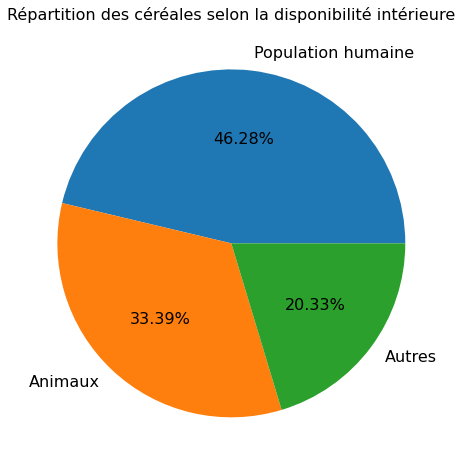

In [154]:
# Création du graphique pour les proportions récupérées

# Stockage des chiffres dans un tableau (20,33 correspond à ce qui n'est pas des céréales)
dispo_cereales_chiffres = [dispo_cereales_population, dispo_cereales_animaux, 20.33]

# Création des labels
dispo_cereales_labels = ['Population humaine', 'Animaux', 'Autres']

# Création du graphique
plt.figure(figsize=(12, 8))
plt.pie(dispo_cereales_chiffres, labels=dispo_cereales_labels, autopct='%.2f%%', textprops={'fontsize': 16})
plt.title('Répartition des céréales selon la disponibilité intérieure', fontsize=16)
plt.show()

## Requête N°2 - <a class="anchor" id="section_3_2">la Thaïlande et l'utilisation du manioc</a>

In [109]:
manioc = df_dispo_alimentaire

In [110]:
# Création d'une dataframe pour garder que la Thaïlande et le manioc en produit
df_manioc = manioc.loc[(manioc['Zone'] == "Thaïlande") & (manioc['Produit'] == 'Manioc'), :]

In [111]:
# Vérification de la dataframe
display(df_manioc.head())

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.00,2081.00,40.00,13.00,0.05,0.14,6264.00,25214.00,1250.00,871.00,1511.00,30228.00,NaN,0.00,0.00


In [112]:
# Calcul de la proportion de manioc pour la population humaine
manioc_dispo_population = df_manioc["Nourriture"] / df_manioc["Disponibilité intérieure"] * 100

# Affichage de la proportion de manioc pour la population humaine
display(manioc_dispo_population)

13809   13.90
dtype: float64

In [113]:
# Calcul de la proportion de manioc pour les animaux
manioc_dispo_animaux = df_manioc["Aliments pour animaux"] / df_manioc["Disponibilité intérieure"] * 100

# Affichage de la proportion de manioc pour les animaux
display(manioc_dispo_animaux)

13809   28.74
dtype: float64

In [114]:
# Calcul de la proportion de manioc pour l'exportation
manioc_dispo_exportation = df_manioc['Exportations - Quantité'] / (
    df_manioc['Production'] + df_manioc['Importations - Quantité'] + df_manioc['Variation de stock']) * 100

# Affichage de la proportion de manioc pour l'exportation
display(manioc_dispo_exportation)

13809   80.10
dtype: float64

In [115]:
# Initiation d'une variable pour récupérer la population Thaïlandaise par la suite
thailande_population = df_population

In [116]:
# Récupération de la population Thäilandaise
thailande_population = thailande_population.loc[
    (thailande_population['Zone'] == 'Thaïlande') & (thailande_population['Année'] == 2017), :]

In [117]:
# Vérification de la récupération ci-dessus
display(thailande_population.head())

,Zone,Année,Valeur
1312,Thaïlande,2017,69209.81


In [118]:
# Initialiation d'une variable pour récupérer la population Thaïlandaise en sous-nutrition par la suite
thailande_sous_nutrition = df_sous_nutrition

In [119]:
# Jointure par la gauche entre la population Thäilandaise et la population en sous-nutrition Thaïlandaise
thailande_population = pd.merge(thailande_population, thailande_sous_nutrition, on="Zone", how="left")

In [120]:
# Vérification de la jointure
display(thailande_population.head())

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
0,Thaïlande,2017,69209.81,2012-2014,6.20
1,Thaïlande,2017,69209.81,2013-2015,6.00
2,Thaïlande,2017,69209.81,2014-2016,5.90
3,Thaïlande,2017,69209.81,2015-2017,6.00
4,Thaïlande,2017,69209.81,2016-2018,6.20


In [121]:
# Restriction sur la colonne "Année_y"
thailande_population = thailande_population.loc[thailande_population['Année_y'] == '2016-2018', :]

In [122]:
# Vérification de la restriction sur l'année
display(thailande_population.head())

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
4,Thaïlande,2017,69209.81,2016-2018,6.20


In [123]:
# Changement du type de la colonne "Valeur_y" pour la passer en float64 (object de base)
thailande_population['Valeur_y'] = thailande_population['Valeur_y'].apply('float')

In [124]:
# Renommage des colonnes pour plus de lisibilité
thailande_population.rename(columns = {
    'Valeur_x' : 'Population sous-nutrition (millions)',
    'Valeur_y' : 'Population (millions)'},
                            inplace=True)

In [125]:
# Mise à l'échelle des colonnes
thailande_population['Population sous-nutrition (millions)'] = (
    thailande_population['Population sous-nutrition (millions)'].sum() * 1000)
thailande_population['Population (millions)'] = thailande_population['Population (millions)'].sum() * 1000000

In [126]:
display(thailande_population.head())

,Zone,Année_x,Population sous-nutrition (millions),Année_y,Population (millions)
4,Thaïlande,2017,69209810.00,2016-2018,6200000.00


In [127]:
# Suppression de la colonne "Année y"
del thailande_population['Année_y']

In [157]:
# Calcul de la population Thaïlandaise en sous-nutrition
thailande_proportion_population = (
    thailande_population['Population sous-nutrition (millions)'].sum() / thailande_population['Population (millions)']) 

# Affichage de la proportion en sous-nutrition
print(thailande_proportion_population)

4   11.16
Name: Population (millions), dtype: float64


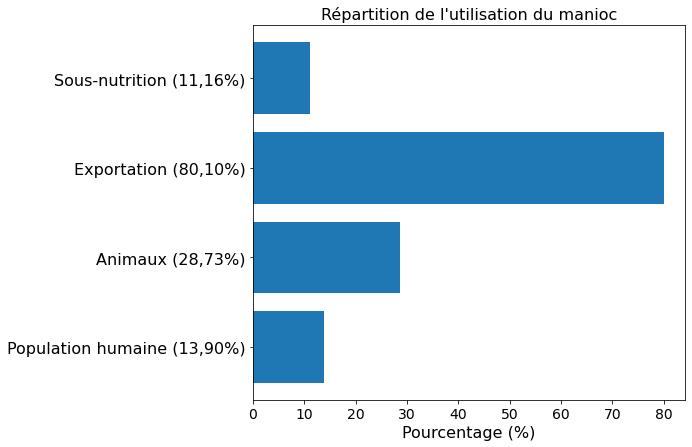

In [159]:
# Création du graphique sur l'utilisation du manioc

fig = plt.figure()
axes = fig.add_axes([0.7, 0.6, 1, 1.3])
population_x = ['Population humaine (13,90%)', 'Animaux (28,73%)', 'Exportation (80,10%)', 'Sous-nutrition (11,16%)']
chiffres_y = [13.90, 28.73, 80.10, 11.16]
plt.barh(population_x, chiffres_y)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel("Pourcentage (%)", fontsize=16)
plt.title("Répartition de l'utilisation du manioc", fontsize=16)

plt.show()